In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

# Model-free Value methods

In the absence of a model
- we can only learn about the dynamics of the Environment
    - by *interacting* with the Environment
    - playing out an entire episode/trajectory
    - gather rewards and successor state information

Each interaction yielding an episode/trajectory
- is a *sample*
- drawn from an unknown Environment Transition Probability distribution $\transp(\state, \act)$

This means multiple episodes are necessary
- to draw a sufficiently diverse sample of $\transp(\state, \act)$
    - for each $(\state , \act)$ combination
    
Contrast this with model-based methods
- all knowledge of the Environment is available without interacting

# Model-free vs Model-based methods: differences

Although the update equations for model-based and model-free methods
- appear similar on the surface
- there are deeper differences

The update equation for both model/model-free
- define $\statevalfun_{k+1}(\state)$ as a function of successor states $\statevalfun_{k}(\state')$

    

In model-based methods
- $\statevalfun_{k}(\state')$ is **not** a random variable
    - because the transition probabilities are *known constants*
- it is a biased (but deterministic) estimate
    - based on *partial* information before convergence
- Notation: we use placeholders for $\state, \act, \rew, \state'$

In model-based methods, 
- the state $\state$, action $\act$, reward $\rew$, successor state $\state'$
- are *samples* from one step of a single actual episode/trajectory

$$\state = \stateseq_\tt, \act = \actseq_\tt,   \rew = \rewseq_{\tt+1}, \state' = \stateseq_{\tt+1}$$

- are *random*
    - dependent of the Environment's choice of $\transp(\stateseq_\tt, \actseq_\tt)$ during the episode.

Thus
- $\statevalfun_{k+1}(\stateseq_\tt)$ is a random variable
- that depends on *another* random variable: $\statevalfun_{k}(\stateseq_{\tt+1})$

When 
- an estimate of a variable (e.g., $\statevalfun_{k+1}(\stateseq_\tt)$)
- is based on *another estimated value* (e.g., $\statevalfun_{k}(\stateseq_{\tt+1})$)

this is called *Bootstrapping*.

We will introduce
- the *Temporal Difference (TD)* family of value-based/model-free methods

that are based on Bootstrapped estimation.

We can characterize the estimates by
- the bias
    - how far the estimate is from the true value
- *variance*
    - by its dependence of other random variables (which have variance as well)

## Converging to true $\statevalfun(\state)$

In order for a model-free method to converge to the true $\statevalfun(\state)$
- it must sample enough episodes
- to *experience* the full distribution of $\transp(\state, \act)$

Note
- we don't actually *observe* $\transp(\state, \act)$
- instead, in an episode 
    - we receive a *random sample* of the reward $\hat\rew(\state, \act)$ from the $\transp(\state, \act)$ distribution
- by summing the random samples of the rewards from state/action pair $(\state, \act)$
- we converge on 
$$
\bar\rew(\state, \act) = \Exp{\rew \sim \transp(\state, \act) } ( \hat\rew(\state, \act) )
$$

The Expected Reward is what we need
- not the actual $\transp(\state, \act)$

## Model-free vs Model-based methods: Summary

| Aspect                           | Model-based Bellman backup         | Model-free TD backup                                         |
|:-------------------------------- |:---------------------------------- |:------------------------------------------------------------ |
| Determinism/randomness           | Deterministic (no random sampling) | Stochastic (sampled; random variable)                        |
| Need for exploration             | No                                 | Yes                                                          |
| Bias (before convergence)        | Yes, if values are not converged   | Yes, for same reason—and also due to bootstrapping           |
| Variance of backup               | Zero (averaged over all outcomes)  | Nonzero (sample-specific, reduces with averaging)            |
| Source of update target          | Full probability model             | Single experience sample                                     |
| Convergence (with enough sweeps) | To true value                      | To expected value (with sufficient exploration and learning) |

## Greed is not (always) good

Consider the policy $\act = \pi(\state)$ used by a method during its learning phase.

Before learning
- each $\act$ will be equally likely
- symmetric initialization of initial, uninformed policy

If $\pi(\state)$ were completely deterministic
- in every episode during learning in which we arrive at state $\state$
- we would take the same action $\act$
- most likely the *first* action chosen in the first episode

But the action chose in the first episode
- may not be the optimal one

A deterministic policy locks us into a potentially sub-optimal choice.

This is an illustration of the *exploration/exploitation* tradeoff 
- Choosing the action currently believed to be optimal is *exploitation* (*greedy* choice)
- Choosing a different action is called *exploration* (*non-greedy* choice)

In model-free methods
- we may be forced to make action choices *that are not optimal* with respect to the current policy
- in order to better sample the Environment

An $\epsilon$-greedy policy makes
- the greedy choice with probability $(1-\epsilon)$
- the non-greedy choice with probability $\epsilon$

# Temporal Difference (TD) methods

Temporal Difference (TD) is a family of value-based methods 
characterized by the use of
 *bootstrapping*
- creating an estimate that depends on other estimates

We will show two members of this family, that are model-free analogs of previously introduced model-based methods
- Value learning $\statevalfun(\state)$
- Q-learning $\actvalfun(\state, \act)$

To be concrete: we focus on $\statevalfun(\state)$.

The update (backup) Bellman equation for $\statevalfun(\state)$ is 

$$
 \begin{array} \\
 \statevalfun_{\pi,k+1}(\stateseq_{\tt})  & = & \rewseq_{\tt+1}  & \text{immediate reward} \\
  && + \\
  && \disc \statevalfun_{\pi,k} ( \stateseq_{\tt+1})
  &\text{ current estimated value of successor} \\
\end{array}
$$

$\statevalfun_{\pi,k+1}(\stateseq_{\tt})$ is called the *target*.

In contrast to model-based
- where the equation is an expectation over *all possible actions*
    - because the probabilities are known

the model-free update is based on the *single action* that was actually taken during the episode.

Algebra:

We can express 
- iteration $(k+1)$'s update of iteration $k$'s estimate 

as an increment $\delta$ to the previous value



$$\statevalfun_{\pi,k+1}(\stateseq_{\tt}) = \statevalfun_{\pi,k}(\stateseq_{\tt}) +   \delta$$

where
$$
\delta = \statevalfun_{\pi,k+1}(\stateseq_{\tt}) - \statevalfun_{\pi,k}(\stateseq_{\tt})
$$

This is know as the *Temporal Difference (TD)* equation.


Temporal differencing moves the prior estimate 
- *toward the target*
- by applying $\delta$
    - which is called the *Temporal Difference Error*

Since $\delta$ is a bootstrapped estimate
- most methods moderate the increment
- with a learning rate $\alpha$
- as we did in Gradient Descent

in order to make updates less noisy (reduced variance).

Thus the update equation is typically written as


$$\statevalfun_{\pi,k+1}(\stateseq_{\tt}) = \statevalfun_{\pi,k}(\stateseq_{\tt}) +  \alpha * \delta$$

**p-step ahead updates**

The update above is based on the immediate (one step ahead) reward.

This method is called *1-step TD*

We can generalize this to *p-step TD* which uses
- rewards $\{ \rewseq_{\tt'} \; | \;  \tt \lt \tt' \le \tt+p \} $
- $\statevalfun_{\pi,k} (\stateseq_{\tt+p})$


$$
\delta = \left[ \sum_{i=1}^{p} \gamma^{i-1} R_{t+i} + \gamma^{p} \statevalfun_{\pi,k}(\stateseq_{t+p}) \right] - \statevalfun_{\pi,k}(\stateseq_{\tt})
$$



Note that the $\delta$ used for iteration $(k+1)$  target $\statevalfun_{\pi,k+1}(\stateseq_\tt)$
- depends *only on iteration $k$* values of the $p$ successor states
 $$\statevalfun_{\pi,k}(\stateseq_{\tt+p})$$
- rather than the post-update value
$$\statevalfun_{\pi,k+1}(\stateseq_{\tt+p})$$

That is
- iteration $(k+1)$ updates to *all* states
- occur simultaneously
- not sequentially
 


**Pseudo-code for p-step TD**

We give some code below.

The apparent complexity of the code arises
- because p-step TD, for $p \gt 1$
- involves returns that won't be experienced
- until $(p-1)$ steps after step $\tt$

So the update for $\statevalfun_{\pi,k}(\stateseq_\tt)$ is delayed $p-1$ steps
- until we accumulate the remaining rewards
- at the beginning of update $(k+1)$ we already have the value of $\statevalfun_{\pi}(\stateseq_{\tt+p})$ needed
    - i.e., $\statevalfun_{\pi,k}(\stateseq_{\tt+p})$ 

        from collections import defaultdict

        gamma = 0.99             # Discount factor
        alpha = 0.1              # Learning rate
        k = 3                    # Number of steps (set k as needed)
        V = defaultdict(float)   # State-value function

        def td_k_episode(env, policy, k):
            states = []
            rewards = []

            s = env.reset()
            states.append(s)
            done = False
            t = 0

            while not done:
                a = policy(s)
                s_next, r, done, info = env.step(a)
                rewards.append(r)
                states.append(s_next)
                t += 1

                # Only update state t-k once enough future steps are observed
                if t >= k:
                    # Build k-step TD target: sum future rewards, bootstrap from V(states[t+1])
                    G = sum(gamma**i * rewards[t-k+i] for i in range(k))
                    G += gamma**k * V[states[t+1]]  # Bootstrapped value if not terminal
                    V[states[t-k]] += alpha * (G - V[states[t-k]])

                s = s_next

            # Final updates for states near episode end (insufficient future rewards for full k-step backup)
            T = len(states) - 1
            for t in range(T - k, T):
                if t >= 0:  # skip negative indices for short episodes
                    effective_k = T - t
                    G = sum(gamma**i * rewards[t+i] for i in range(effective_k))
                    V[states[t]] += alpha * (G - V[states[t]])

## Q-learning: Action-value function

Just as in the model-based method
- Q-learning creates a function from $(\state,\act)$ pairs to expected returns

$$
\actvalfun_\pi: \state \times \act \to \Reals
$$

So the action $\act^*$ that leads to maximum $\statevalfun_\pi(\state')$ 
is easily obtained from the Action-Value function via

$$
\pi^*(\state) = \argmax{\act} \actvalfun(\state, \act)
$$

Note: the $\argmax{}$ results in a *deterministic* policy just as before

The Bellman equation for the Action-Value function is
$$
\begin{array} \\
\actvalfun_{\pi,k+1}(\state, \act)
& = & \E_\pi \left( \rewseq_{\tt+1} + \disc \max{a'} \actvalfun_{\pi,k}(\state_{\tt+1}, a') \right) & \text{immediate reward } \rewseq_{\tt+1} \\
& & & \text{plus discounted future reward earned by} \\
& & & \text{choosing best action } \act' \text{ in new state } \state_{\tt+1} \\
\end{array}
$$

We show some pseudo-code for Q-learning below.

The **notable aspect of the model-free** version (contrast to model-based version) of Q-learning:
- the use of a Greedy Policy to balance Exploration and Exploitation

**Pseudo code for Q-learning**

    Initialize Q(s, a) arbitrarily for all states s and actions a (often Q(s, a) = 0)
    
    Set learning rate alpha, discount factor gamma, exploration rate epsilon
    
    For episode = 1 to number_of_episodes:
        Initialize state s
        
        Repeat until s is terminal:
            With probability epsilon:
                Choose a random action a (exploration)
            Otherwise:
                Choose action a = argmax_a Q(s, a) (exploitation)
                
            Take action a, observe reward r and next state s'
            
            Update Q(s, a) using:
                Q(s, a) = Q(s, a) + alpha * [r + gamma * max_{a'} Q(s', a') - Q(s, a)]
                
            s = s'


In the above code
- we build a table $Q$ for the action value function $\actvalfun_\pi$ 
- You can see the $\epsilon$-greedy strategy

        With probability epsilon:
            Choose a random action a (exploration)
        Otherwise:
            Choose action a = argmax_a Q(s, a) (exploitation)
- Update assumes subsequent action choices are greedy  

        max_{a'} Q(s', a')
        
        
- Model-free: Notice that we don't make use of
    -  $\transp(\state', \rew | \state, \act)$
    - or any reward other than the one received by taking the chosen action

### Q-learning in action: Frozen Lake

Here we see Q-learning in action, using the Frozen Lake environment.

We will show an animation of
- the Value table and policy
- as derived from the Q-table

Here is the value before Q-learning begins.

<br>
<table>
    <center><strong>Value function (uninitialized) as a table</strong></center>
<tr>
    <td><img src="images/Frozen_Lake_env.png"></td>
    <td><img src="images/qlearning_policy_evolution_0.png"></td>
</tr>
</table>

Here is an evolution in the early episodes of Q-learning training.

<br>
<table>
    <center><strong>Value function: Q-learning early episodes</strong></center>
<tr>
    <td><center><strong>Early episode </strong><br><br>It takes many episodes for the reward to diffuse from G<br>We need to experience an episode that reaches the neighbor of G</center></td>
    <td><center><strong>Slightly later episode</strong></center></td>
</tr>
    
<tr>
    <td><img src="images/qlearning_policy_evolution_70.png"></td>
    <td><img src="images/qlearning_policy_evolution_145.png"></td>
</tr>
</table>

Hotter colors represent higher expected reward.

In the left-most early episode
- we see the Gift state (G) reward information diffusing to its immediate neighbor (state 14)
- and the arrow (policy derived from Q-table)
    - moving from neighbor to G
    
In the slightly later episode
- we see the information from G diffusing farther away
- and policy being update based on the new information

Below is a complete animation

**Note**

The animation may fail to progress *after the first time* it is run
- this is due to your browser caching data
- and not reloading the GIF

You may need to reload the page in order to refresh the animation.

<!--- #include (images/q_table_evolution_refined.gif) --->

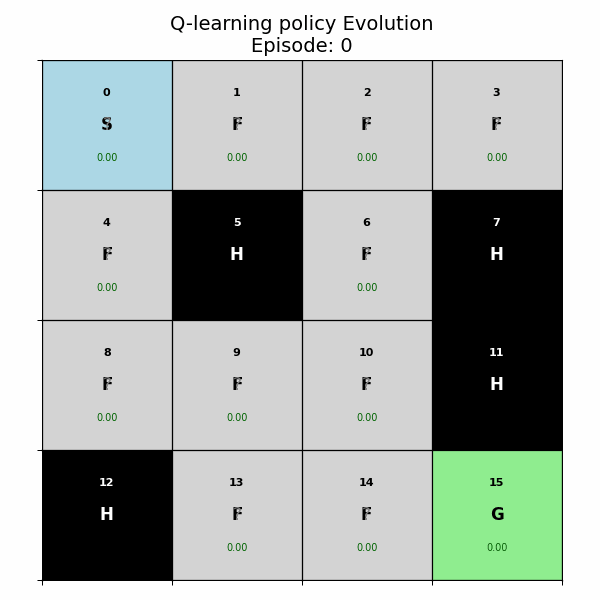

In [2]:
from IPython.display import Image
Image(filename='images/q_table_evolution_refined.gif')


We can observe the evolution of Expected Return (from initial state)
- as a function of number of episodes

<table>
    <center><strong>Q-learning: evolution of Expected episode return</strong></center>
<tr>
    <td><img src="images/Frozen_Lake_Qlearning_return_vs_episode.png"></td>
</tr>
</table>
    

Contrast this graph with the one that would be obtained by a *Model-based* method.

In Model-based
- we don't need episodes to gather experience
    - we can solve by Dynamic Programming
    - or *simulation*
- there are multiple iterations rather than multiple episodes
- each iteration moves the signal (reward from gift state G) closer to the initial state S

 

## Deep Q-learning (DQN)

The method for Q-learning presented involved creating a *table* implementing the mapping $\actvalfun_\pi$.

This is only practical when the size of the table is small
- the number of states for many problems (e.g., games) is extremely large
- not practical

*Deep Q-Learning*
- treats $\actvalfun_\pi$ as a function
- which is approximated by a Neural Network (the *Deep Q-Network (DQN)*)

The function is *trained*
- to reproduce the value calculated in ordinary Q-learning
- via a Loss function (MSE)
    - that minimizes the difference between
        - the NN output
        - and the mathematical definition of the Q function.


That is:
- We train the NN function $Q_{\theta}(\stateseq_\tt, \actseq_\tt)$
- to approximate the *target* (estimated true value) $$\actvalfun_\pi( \stateseq_\tt, \actseq_\tt)$$
- Using an MSE per-example loss
$$
(Q_{\theta}(\stateseq_\tt, \actseq_\tt) - \actvalfun_\pi( \stateseq_\tt, \actseq_\tt) )^2
$$

The loss is
- calculated on a mini-batch of steps
- gradient descent on the batch loss results in an update to the NN parameters $\Theta$


So one fundamental addition to the ordinary Q-learning algorithm
- record state transitions in a Replay Memory

Mini-batches are sampled from the Replay Memory


The Replay Memory enables *Experience Replay*
- off-line training
    - can train on the *same state transition* without executing the episode again
    - efficient use of transitions (can reuse)
- batch creation
- having previous transitions in a batch
    - prevents forgetting that might occur by only seeing *new* transitions

**Pseudo code for Deep Q-learning**

        Initialize replay memory D to capacity N
        Initialize main Q-network with random weights θ
        Initialize target Q-network with weights θ^- = θ
        
        Set exploration rate ε, discount factor γ, learning rate α
        
        For episode = 1 to M:
            Initialize state s
            
            For each step in episode:
                With probability ε:
                    Choose random action a (exploration)
                Else:
                    Choose a = argmax_a Q(s, a; θ) (exploitation)

                Take action a, observe reward r and next state s'
                
                Store transition (s, a, r, s') in replay memory D

                Sample random mini-batch of transitions (s_j, a_j, r_j, s'_j) from D

                For each sample in the batch:
                    y_j = r_j + γ * max_{a'} Q(s'_j, a'; θ^-)   # Target Q-value
                    # Predicted Q-value
                    Q_pred = Q(s_j, a_j; θ)

                Compute loss = mean squared error between y_j and Q_pred

                Update network weights θ by minimizing loss via gradient descent

                Every C steps:
                    Update target network weights θ^- = θ

                Update state s = s'


Key aspects of the above code:

- $\epsilon$-greedy choice of action

- Replay memory D
    - stores experiences *using the policy that was in effect* when the experience was created
        - not necessarily the current policy (different values of parameter $\theta$)
    - a batch of experiences is sampled from D to train the NN computing `Q_pred`
- Target `y_j` is the Bellman equation for Q-learning
- `Q_pred` is the NN current approximation

- Updates in a *batch* 

    - in the "basic" value-action method
        - $\actvalfun_\pi$ is updated for *each action* of the Agent
    - in Q-learning
        - $Q$ (analagous to $\actvalfun_\pi$) is updated with *multiple, randomly chosen* **prior** actions of the Agent
        - mini-batch: target computed for each example in the batch

                For each sample in the batch:
                    y_j = r_j + γ * max_{a'} Q(s'_j, a'; θ^-)   # Target Q-value
                    # Predicted Q-value
                    Q_pred = Q(s_j, a_j; θ)
                    
        - per-example loss: compare target `y_j` with prediction `Q_pred`


- Loss function: MSE between `Q_pred` and calculated `y_j`

        Compute loss = mean squared error between y_j and Q_pred

    - `Q_pred` is the value predicted by the NN
        - for a *batch* of examples
    
    - `y_j` is the "target value":
        - for the batch
        - the true value that the NN is trying to match
        - *defined* by the same calculation as regular Q-learning (Bellman equation)
    
        r + gamma * max_{a'} Q(s', a')
        
        but `Q(s', a')` replaced by NN calculated `Q(s', a'; θ^-)` 
        - where θ^- are the NN's lagged weights
    

The advantage of updating on multiple actions rather than just the current one
- smoother updates
    - changes "averaged" over many actions, not just the current one
- avoids catastrophic forgetting
    - emphasizes retention of past knowledge, not just current action
    
This is all similar to the reason we use Mini-Batch Gradient Descent in Neural Networks.

Why the lagged weights $\theta^-$ in computing the target value via `Q(s', a'; θ^-)` ?

To introduce stability in training.

If we don't lag the weights: the targets computed for other mini-batches will be based on different weights
- so we have a moving target as well as a moving function

The lagged weights are periodically synchronized with the most recent weights.

## Q-learning (Action-value function) vs V-learning (Value function)

The main difference between the Value function and the Action-Value function
- Value function: the value of a state is averaged over *all* actions
- Action-Value function
    - absent a model: estimate effect of a single action
    
The averaging in V-learning can make the estimates
- more accurate and less noisy
- particularly when the action chosen is via the "max"

(We will quantify this in the section on Bias and Variance)




## Monte Carlo (MC) method (not a TD method)

In the *Monte Carlo* method
- the update $\delta$ to *each state*
- is based on the return to go from the state
    - return accumulated *to the end of the episode*
- rather than the return of just the next $p$ experiences

Loosely, it is TD($\infty$)


**Note**

Technically: MC is *not* a TD method
- as it does not rely on bootstrapping
    - not based on other estimated values

To highlight the difference between TD an MC:
- consider an episode from initial $\stateseq_1$ to $\stateseq_2$ to terminal state $\stateseq_3$ 
- earning a reward of $+1$ on the transition from $\stateseq_1$ and $\stateseq_2$ 
- with initial state values
$$\statevalfun_\pi(\stateseq_{1,0}) = \statevalfun_\pi(\stateseq_{2,0}) = 0 $$

After episode $1$
- using TD
$$\statevalfun_\pi(\stateseq_{1,1}) = \statevalfun_\pi(\stateseq_{2,1}) = 1 $$
- using MC
$$
\begin{array} \\
\statevalfun_\pi(\stateseq_{2,1}) & = 1 & \text{same as TD} \\
\statevalfun_\pi(\stateseq_{1,1}) & = 2 & \text{because it uses } \statevalfun_\pi(\stateseq_{1,1}) = 1 \\
\end{array}
$$



To illustrate the backups:

    State_0 --a--> State_1 --a--> ... --a--> State_T (terminal)

    MC:    Wait for episode to finish, then update $V(s)$
    TD:    Update $V(s)$ at every transition using $V(s_{t+1})$


| Method                  | Update Basis                                     | Backup Target                                                     |
|:----------------------- |:------------------------------------------------ |:----------------------------------------------------------------- |
| TD 1-step                  | After 1 step, immediate reward + next value      | $R_{t+1} + \gamma V(S_{t+1})$                                    |
| TD k-step                   | After k steps, sum of k rewards + value at $t+k$ | $R_{t+1} + \ldots + \gamma^{k-1} R_{t+k} + \gamma^{k} V(S_{t+k})$ |
| MC (TD($\infty)$ / TD($\lambda=1$)) | End of episode, full sample return               | $G_t$ (total return to episode end)                               |

We summarize the comparison of TD and MC:

| Feature            | Monte Carlo                   | Temporal Difference           |
|:-------------------|:-----------------------------|:-----------------------------|
| Reliance           | Full episode return           | Single step + estimated value |
| Bootstrapping      | No                            | Yes                          |
| Update Timing      | End of episode                | At every step                |



# Bias and Variance

We now have multiple methods for RL
- how can we compare them ?

We will introduce the concepts of Bias and Variance as one metric with which to compare methods.

To be concrete:

What are the advantages/disadvantages of Temporal Difference(1 step) vs Monte Carlo in updating
the Value function ?


Consider iteration $k$:

In TD:
- the value of the successor state is *not* the true end-of-episode $k$ return
- it is an *estimate* of the state's value based on the *previous* iteration
- updating one estimate using another estimated is called *bootstrapping*

In MC
- the value of the successor state is the *true* end-of-episode $k$ return

Because TD depends on an estimate
- we say that TD is *biased*
    - since it is based only on the probabilities *sampled thus far*
-

Moreover, let's suppose that rewards are stochastic
- hence, each reward is a random variable

TD 1-step update 
- depends on **exactly one** random variable $$\hat\rew_{\tt+1}$$

TD k-step update
- depends on $k$ random variables: rewards for times $\tt+1, \ldots, \tt+k$

MC update
- depends on **at least one**
    - rewards of *all* subsequent states of the episode $\pi$
 $$\hat\rew_{\tt+1}, \ldots, $$

The variance of a sum of $k$ random variables is *at least* $k$ times the variance of each
- assuming the variance of each variable is the same
- independence of random variables

So the variance of the $\statevalfun$ estimated by the various methods
- is smallest for TD 1-step
- increasing with $k$ for TD k-step
- is largest for Monte Carlo


**But**
- the *bias* decreases in the opposite direction of the increase of the variance
- estimate based on more information

## Bias and Variance of the methods presented

| Method                   | Bias          | Variance      | Notes                                                                                                        |
|:------------------------ |:------------- |:------------- |:------------------------------------------------------------------------------------------------------------ |
| DP (Dynamic Programming) | Low           | Low           | Uses full environment model; updates use true expectations.                                                  |
| MC (Monte Carlo)         | None          | High          | Unbiased (targets equal expected return), but episodes can have widely varying returns.                      |
| TD (Temporal Difference) | Moderate      | Moderate/Low  | Bootstrap introduces bias (approximate next value), but reduces variance compared to MC.                     |
| V-learning (State Value) | Moderate      | Low           | Like TD if bootstrapped; low-variance due to value averaging.                                                |
| Q-learning               | Moderate/High | Moderate/High | Off-policy, can have bias (maximization, bootstrapping); variance may increase due to noise in max operator. |

**Key Points**

DP (Dynamic Programming): Lowest bias and variance, but needs a full model (rarely available in practice).

MC: Unbiased estimates, but high variance due to sampling full returns.

TD: Bootstrapping introduces bias but greatly lowers variance versus MC.

V-learning: Similar profile to TD (if bootstrapped); often lower variance than Q-learning due to value averaging.

Q-learning: Can be more biased/variable due to off-policy backups and maximization over sampled estimates.



# On-policy versus Off-policy

For many methods (including Q-learning above) the method uses two sub-policies

- the *behavior policy*: the one that chooses an action.  For Q-learning this is

        With probability ε:
            Choose random action a (exploration)
        Else:
            Choose a = argmax_a Q(s, a; θ) (exploitation)

- the *target policy*: the one that we are trying to learn
    - target value
    
           y_j = r_j + γ * max_{a'} Q(s'_j, a'; θ^-)   # Target Q-value
           
    - the value to which Gradient Descent will guide the NN
    - in minimizing Loss
        - compares target `y_j` with prediction `Q_pred = Q(s_j, a_j; θ)`
 

When the Behavior and Target policies are identical
- we call the method *On-policy*

If the Behavior and Target polices are potentially different
- we call the method *Off-policy*

Q-learning is an **off-policy** method for several reasons.

The primary reasons are
- target policy is always greedy
- behavior policy
    - $\epsilon$-greedy
    - example from replay buffer may have been conduced with *an older behavior policy* (different NN weights)
        - even if the example's $\epsilon$-greedy choice was from the "greedy" side of the choice

| Reason                                 | Behavior Policy (used to collect experience)                                              | Target Policy (used in Q-value update)                                          |
|:-------------------------------------- |:----------------------------------------------------------------------------------------- |:------------------------------------------------------------------------------- |
| Greedy backup (max operator in update) | Behavior policy may choose non-greedy actions due to exploration                          | Update always targets the action with highest Q-value (optimal policy estimate) |
| Experience replay buffer               | Policy used during sampling in past episodes (possibly older $\epsilon$-greedy or random) | Greedy policy from current network: $a^* = \argmax{a} Q(s, a; \theta^-)$     |          |
| Policy/parameter mismatch over time    | Behavior policy determined by weights $\theta$ at time of sampling                       | Target policy determined by weights $\theta^-$ at time of update (can differ)  |

    


# SARSA: On-Policy Q-learning

We present another member of the TD family.

There is a method called *Deep SARSA* that modified Q-learning to be on-policy.
- does not uses Experience Replay buffer
- changes the target from

        y_j = r_j + γ * max_{a'} Q(s'_j, a'; θ^-)

- to

        y_j = r_j + γ * Q(s'_j, a'_j; θ^-)

    - target uses the action choice `a'_j` of current behavior policy
    
            Q(s'_j, a'_j; θ^-)
        
    - rather than the action that **maximizes** value
    
            max_{a'} Q(s'_j, a'; θ^-)


Deep SARSA is more stable than DQN
- it is "risk-aware"
    - target is same as behavior when the "exploratory" choice is made for policy
    - so SARSA can learn to avoid risky choices
        - exploratory choices with extreme (negative) rewards
- it is more conservative
    - DQN always makes the greedy choice
    
Compared to DQN, these characteristics make it
- lower variance
- more likely to converge


But SARSA is higher bias  compared to DQN
- the exploratory choice is biased away from the true (optimal) policy



## Grid-world: comparing conservative SARSA to risk-loving DQN
    
We need to navigate in a $(4 \times 12)$ grid
- from start cell $S$
- to goal cell $G$
- without "falling off the cliff" (large negative reward: $-100$) by navigating to cliff cells $C$

There is a negative reward ($-1$) for each time step so the reward is maximized by getting to the goal quickly.

```
.  .  .  .  .  .  .  .  .  .  .  .
.  .  .  .  .  .  .  .  .  .  .  .
.  .  .  .  .  .  .  .  .  .  .  .
S  C  C  C  C  C  C  C  C  C  C  G
```


DQN will favor a path
- that hugs the edge of the cliff
    - faster route to goal $G$
- but that will fall off the cliff during exploration

SARSA will avoid the cliff
- slower route
    
<!--- #include (images/cliffwalking_paths.gif) --->

Below is a complete animation

**Note**

The animation may fail to progress *after the first time* it is run
- this is due to your browser caching data
- and not reloading the GIF

You may need to reload the page in order to refresh the animation.

<!--- #include (images/images/cliffwalking_paths.gif) --->

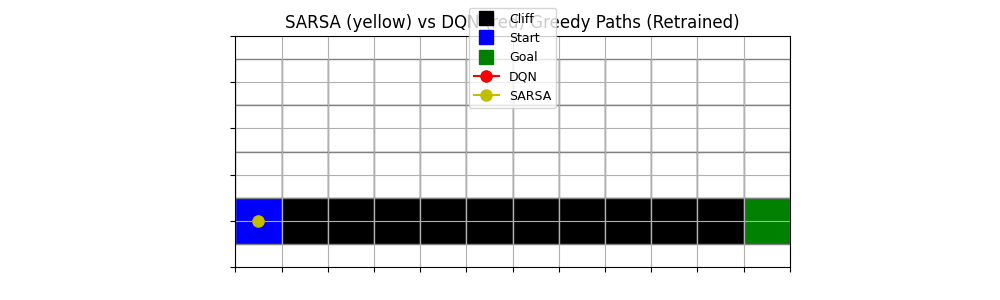

In [3]:

from IPython.display import Image

Image(filename='images/cliffwalking_paths.gif')

Each time a SARSA episode results in falling off a cliff
- a large negative value for $Q(s', a')$ is learned when $a'$ leads to falling off the cliff from state $s'$
- the large negative reward propagates back through all the preceding (safe) states and actions along the path
    - any path that *could* lead to $s'$ with some probability of $a'$ being chosen *becomes deprecated*
- so policy becomes biased toward moving far from the Cliff
- *even if* the action $a'$ was an *exploratory* action (that won't be repeated)

DQN always assumes the continuation of an episode from the current state is optimal
- the `max` prevents $a'$ from being chosen in state $s'$
- so any path that leads to $s'$ *does not become deprecated*




## SARSA vs DQN: Summary

| Feature                     | SARSA (On-Policy)                                             | DQN (Off-Policy)                                                 |
|:--------------------------- |:------------------------------------------------------------- |:---------------------------------------------------------------- |
| Policy Updated              | Behavior policy ($\epsilon$-greedy)                          | Greedy (optimal) policy                                          |
| Update Target               | $r + \gamma Q(s', a')$ (actual next action)                  | $r + \gamma \max{a'} Q(s', a')$ (max over all actions)        |
| Bias/Variance               | Higher bias, lower variance                                   | Lower bias, higher variance (risk of instability/overestimation) |
| Risk Awareness              | Accounts for exploration risk (safer in risky environments)   | Does not account for risk of exploratory actions                 |
| Performance in Large Spaces | Limited without function approx.                              | Handles large/continuous spaces with neural networks             |
| Experience Replay           | Possible but less common                                      | Standard in DQN                                                  |
| Stability                   | Often more stable, especially in risky/confusing environments | Can be less stable, especially with bad hyperparameters          |

# Learning via Code

[Here](RL_OnPolicy_vs_OffPolicy_code_examples.ipynb) is a notebook that demonstrates
- Q-Learning
    - with and without replay memor
- SARSA

## How Each Example Highlights a Salient Point

1. **Q-learning (Off-policy):**
    - **Purpose:** Demonstrates how the behavior policy (epsilon-greedy; explores randomly) differs from the target policy (greedy; always chooses highest Q-value).
    - **Salient Point:** Shows that updates use the greedy maximum Q-value (off-policy), even when the sampled action was exploratory.
2. **SARSA (On-policy):**
    - **Purpose:** Demonstrates on-policy learning where both the behavior and target policies are epsilon-greedy and always match.
    - **Salient Point:** The Q update uses the value of the exact next action chosen by the behavior policy, making sampling and updating fully aligned.
3. **Q-learning with Experience Replay Buffer:**
    - **Purpose:** Shows how experience transitions are stored in a replay buffer and reused for updates.
    - **Salient Point:** Illustrates how off-policy Q-learning leverages exploratory samples and batch updates from the buffer to improve sample efficiency and stabilize learning.


# Sources of Variance in RL

We introduced Variance as a way of comparing TD and MC for value-based methods.

But variance is present in many RL methods and is considered 
 a potential impediment to Learning via RL.
- bigger updates in
    - Value function for Value-based methods
    - Parameters for Policy-based methods
- can cause large changes in Policy
- which can lead to unstable training

We list the types of methods affected by each cause.

There multiple sources of Variance, which we summarize below
- stochastic environment
    - stochastic rewards and state transitions
- stochastic policy
- sparse rewards
    - per-episode vs per-step rewards
    - reward estimates become more noisy
- bootstrapping    


| Source of Variance             | Description                                                       | Methods Most Affected                |
|:-------------------------------|:-------------------------------------------------------------------|:--------------------------------------|
| Environmental Stochasticity   | Random rewards and transitions cause unpredictable outcomes        | Monte Carlo, TD, Policy Gradients    |
| Policy Stochasticity          | Probabilistic (non-deterministic) action selection                | MC, On-policy, Policy Gradients      |
| Long Trajectory Aggregation   | Returns summed over many steps compound the randomness             | Monte Carlo, n-step methods          |
| Sparse or Delayed Rewards     | Few positive signals lead to noisy estimates                       | Monte Carlo, Value-based             |
| Bootstrapping Error           | Using own predictions as targets introduces bias, but lowers variance | TD, Q-Learning                    |
| Credit Assignment Difficulty  | Uncertainty in linking actions to future rewards increases variance | Policy Gradients, MC                 |
| Sample Size & Exploration     | Insufficient samples or aggressive exploration cause wide fluctuations| All methods                       |
| Model/Optimization Instability| Neural network or optimizer issues amplify variance                | Deep RL, Policy Gradient methods     |
| Non-stationarity              | Changing environment or policy during training                     | All methods, esp. online learning    |

**Key Points:**  
- Variance comes from randomness in data, policy, training procedure, and modeling choices.  
- Some sources can be controlled with design choices (e.g., baselines, bootstrapping, averaging), while others are intrinsic to RL problems.

As we introduce new RL methods
- one motivation if to reduce variance

Some potential ways to reduce variance
- $n \gt 1$-step ahead Temporal Difference
- estimating updates in mini-batches
    - as in Gradient Descent


In [4]:
print("Done")

Done
